**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [1]:
import matplotlib.pyplot as plt

import numpy as np
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [2]:
from ExchangeEconomy import ExchangeEconomyClass

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [14]:
model = ExchangeEconomyClass()


N = 76

w1A = 0.8
w2A = 0.3

x1A = np.linspace(0,1,N)
x2A = x1A.copy()

x1possible = []
x2possible = []

for x1 in x1A:
    for x2 in x2A:
        if model.utility_A(x1,x2) >= model.utility_A(w1A,w2A) and model.utility_A((1-x1),(1-x2)) >= model.utility_A(w1A,w2A):
            x1possible.append(x1)
            x2possible.append(x2)

print(x1possible)


[0.14666666666666667, 0.16, 0.16, 0.16, 0.17333333333333334, 0.17333333333333334, 0.17333333333333334, 0.17333333333333334, 0.18666666666666668, 0.18666666666666668, 0.18666666666666668, 0.18666666666666668, 0.18666666666666668, 0.18666666666666668, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.21333333333333335, 0.21333333333333335, 0.21333333333333335, 0.21333333333333335, 0.21333333333333335, 0.21333333333333335, 0.21333333333333335, 0.21333333333333335, 0.21333333333333335, 0.22666666666666668, 0.22666666666666668, 0.22666666666666668, 0.22666666666666668, 0.22666666666666668, 0.22666666666666668, 0.22666666666666668, 0.22666666666666668, 0.22666666666666668, 0.22666666666666668, 0.24000000000000002, 0.24000000000000002, 0.24000000000000002, 0.24000000000000002, 0.24000000000000002, 0.24000000000000002, 0.24000000000000002, 0.24000000000000002, 0.24000000000000002, 0.24000000000000002, 0.25333333333333335, 0.25333333333333335, 0.25333333333333335, 0.25333333333333335, 0.253333333333333

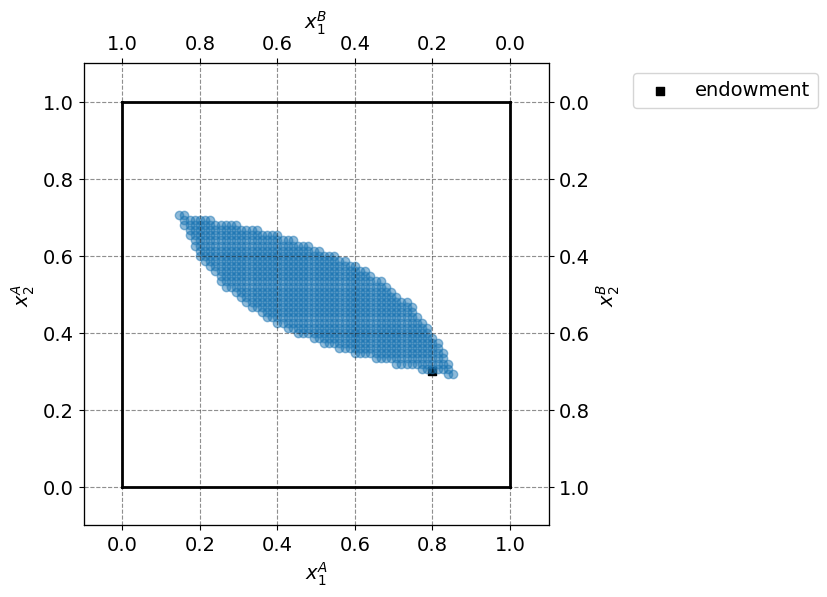

In [18]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
ax_A.scatter(x1possible,x2possible, alpha=0.5)

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

In [31]:
p1 = []

for i in range(N+1):
    p1.append(0.5 + 2*i/N)

error = []

for i in p1:
    error.append(model.check_market_clearing(i))

print(error)

[(0.533333333333333, -0.2666666666666666), (0.4766666666666667, -0.25087719298245603), (0.42539682539682544, -0.2350877192982455), (0.37878787878787856, -0.21929824561403488), (0.3362318840579708, -0.20350877192982442), (0.2972222222222223, -0.18771929824561384), (0.2613333333333331, -0.17192982456140327), (0.228205128205128, -0.1561403508771928), (0.19753086419753085, -0.14035087719298223), (0.16904761904761906, -0.12456140350877187), (0.14252873563218382, -0.1087719298245613), (0.11777777777777754, -0.09298245614035072), (0.09462365591397837, -0.07719298245614015), (0.07291666666666663, -0.06140350877192979), (0.05252525252525231, -0.04561403508771922), (0.033333333333333215, -0.029824561403508643), (0.015238095238095162, -0.014035087719298067), (-0.0018518518518519933, 0.0017543859649125082), (-0.018018018018018, 0.017543859649122973), (-0.03333333333333344, 0.03333333333333355), (-0.047863247863247804, 0.0491228070175439), (-0.061666666666666925, 0.0649122807017547), (-0.0747967479